In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
#df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)#ignore first row

In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [64]:
#Data Cleaning
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [65]:
#Now here we will divide our dataset into two regions and add extra column such thst bejajia ia characterized as 0 and siddi albi as 1

In [66]:
df.loc[122:,"Region"]=1
df.loc[:122,"Region"]=0

In [67]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [68]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [69]:
df[["Region"]]=df[["Region"]].astype(int)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [71]:
df=df.dropna().reset_index(drop=True)

In [72]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [73]:
#dropped null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [74]:
df=df.drop(122).reset_index(drop=True) #remove header row for siddi albes region

In [75]:
#remove spaces in the column name
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [76]:
df.columns=df.columns.str.strip()

In [77]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [78]:
#as all are objects change into int and float
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [80]:
#df[['RH', 'Ws', 'Rain', 'FFMC',
       #'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['RH', 'Ws', 'Rain', 'FFMC',
       #'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [88]:
objects=[features for features in df.columns if df[features].dtypes=='object']
for i in objects:
    if(i!="Classes"):
        df[i]=df[i].astype(float)

In [89]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [92]:
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index=False)

In [94]:
#EDA

In [96]:
df_copy=df.drop(["day","month","year"],axis=1)

In [97]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [98]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [99]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [100]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [102]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
175,25,7,2012,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,not fire,1
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,fire,1
28,29,6,2012,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,not fire,0
134,13,6,2012,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,not fire,1
39,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,not fire,0


In [104]:
df_copy.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
180,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1,1
29,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,1,0
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
198,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0


In [121]:
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [122]:
#Plot density plot for all features
percentage=df_copy["Classes"].value_counts(normalize=True)*100

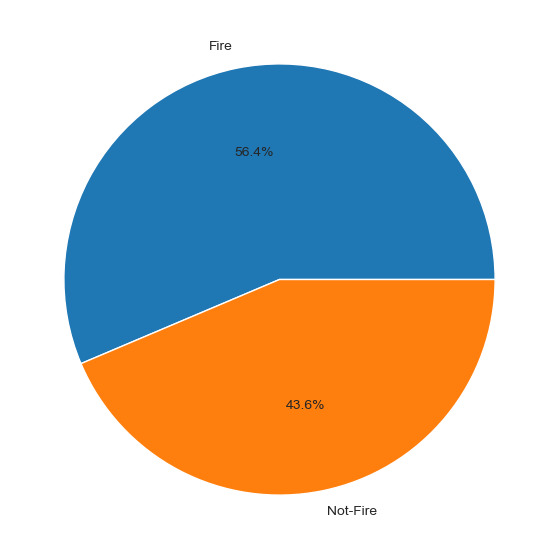

In [123]:
#Plot pie chart
classlabels=["Fire","Not-Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.show()

In [124]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

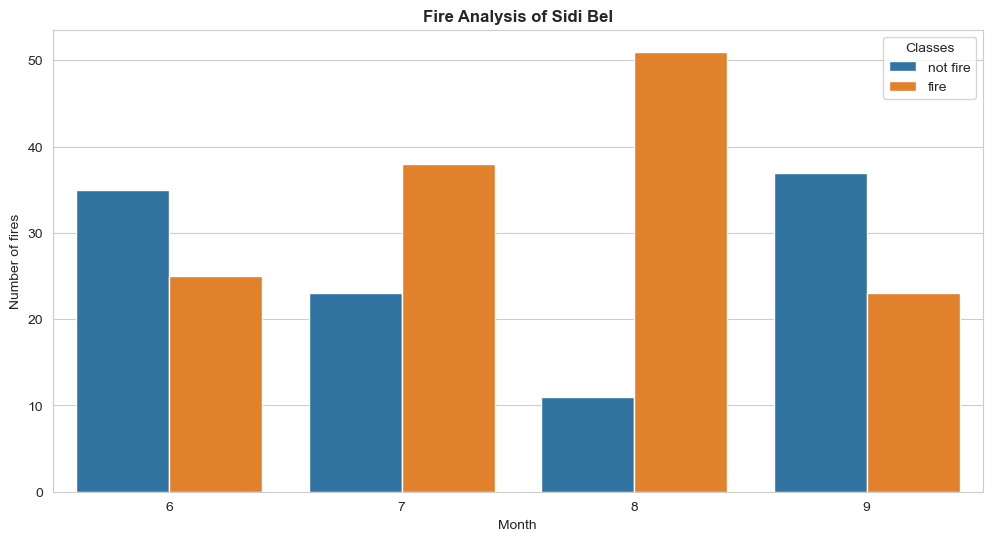

In [134]:
dftemp=df.loc[df["Region"]==1]
plt.subplots(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.title("Fire Analysis of Sidi Bel",weight="bold")
plt.show()

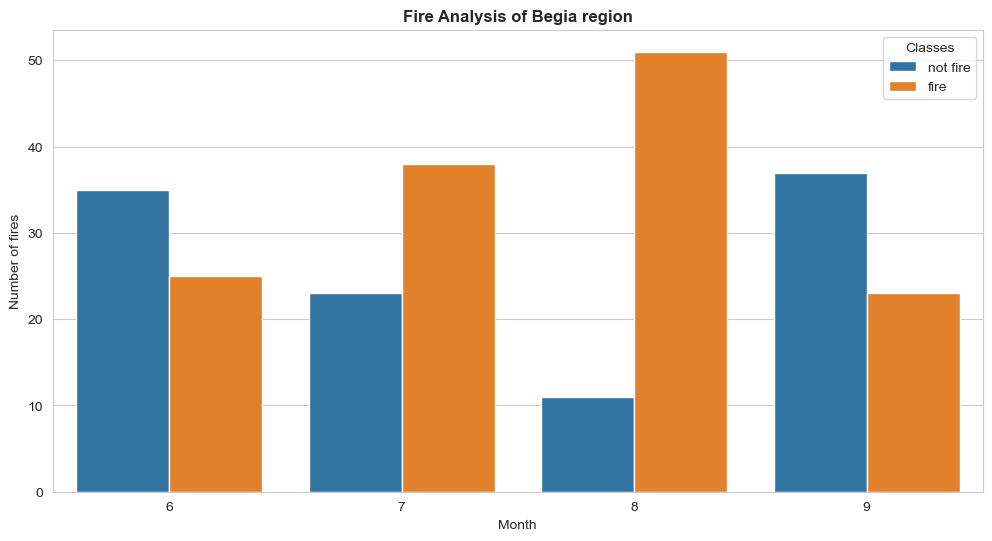

In [135]:
dftemp=df.loc[df["Region"]==0]
plt.subplots(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.title("Fire Analysis of Begia region",weight="bold")
plt.show()